In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [6]:
data = pd.read_csv('STATA.csv', na_filter=False)
data.head()

,Hamlet,Household_ID,Container_ID,Container_position,Water_level,Lid,Fish,Meso,Micronecta,Source,Treatment,Larvae,count_larvae,Full count_pupae
0,0,1,1,0,25,1,0,0,0,0,0,1,206.7,51.6
1,0,2,2,1,25,1,0,0,0,1,2,0,0.0,3.0
2,0,2,5,0,25,0,0,0,0,1,2,0,0.0,0.0
3,0,2,6,0,25,1,0,0,0,0,1,0,0.0,0.0
4,0,3,5,1,30,1,0,0,0,0,1,0,0.0,0.0


In [32]:
traindata=data[data.Container_ID > 2]

traindata.shape

(428, 14)

In [33]:
testdata=data[data.Container_ID < 2]

testdata.shape

(45, 14)

In [7]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

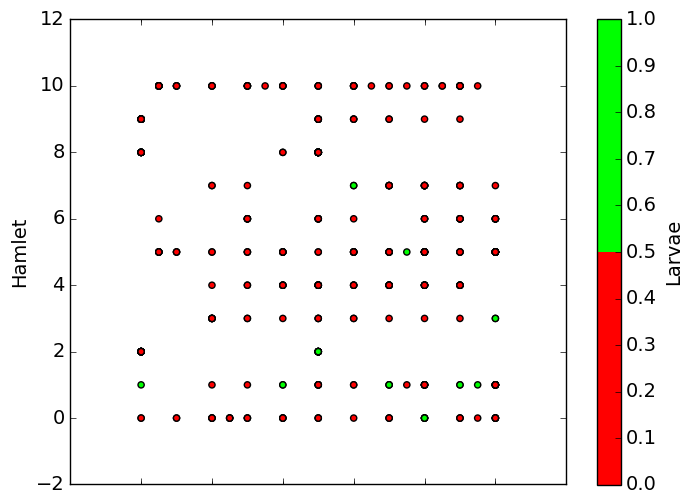

In [34]:
a = traindata.plot(kind = 'scatter', x = 'Water_level', y ='Hamlet', c='Larvae',colormap = cmap_bold)
#a.set_ylim(10,300)

In [41]:
feature_cols = ['Hamlet', 'Container_position', 'Water_level', 'Lid', 'Source', 'Meso']
X = traindata[feature_cols]

In [45]:
feature_cols = ['Hamlet', 'Container_position', 'Water_level', 'Lid', 'Source', 'Meso']
B = testdata[feature_cols]

print B.shape

(45, 6)


In [46]:
y = traindata['count_larvae']

In [47]:
print type(X)
print type(X.values)
print X.head()

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>
   Hamlet  Container_position  Water_level  Lid  Source  Meso
2       0                   0           25    0       1     0
3       0                   0           25    1       0     0
4       0                   1           30    1       0     0
5       0                   1           80    1       0     0
6       0                   1           90    1       0     0


In [48]:
print type(y)
print type(y.values)
y.head()

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: count_larvae, dtype: float64

In [49]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [51]:
print neigh.predict(B)

[ 11.6         26.          17.6          0.           0.8          0.           0.
   0.           7.14285714   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           6.74285714   0.          38.22857143
  38.22857143   0.           0.           0.8          0.           1.2
   1.2          0.           0.           0.           0.        ]
